In [11]:
# zadanie 1.
import pytest
from bs4 import BeautifulSoup
import pandas as pd
with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))
wiersze = []

for lek in data:
    interakcje = []
    bloki = lek.find_all('food-interactions')
    
    for i in bloki:
        interakcje += i.find_all('food-interaction')
        
    lek_info = {
        'ID' : lek.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text,
        'Name' : lek.find('name').text,
        'Typ' : lek['type'],
        'Opis' : lek.find('description').text,
        'Postać' : lek.find('state').text,
        'Wskazania' : lek.find('indication').text,
        'Mechanizm działania': lek.find('mechanism-of-action').text,
        'Interakcje z pokarmami': [i.text for i in interakcje]    
    }
    wiersze.append(lek_info)

wynik1 = pd.DataFrame(wiersze)

wynik1

,ID,Name,Typ,Opis,Postać,Wskazania,Mechanizm działania,Interakcje z pokarmami
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,[Avoid herbs and supplements with anticoagulan...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,[]
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,[]
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,[]
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,[]
...,...,...,...,...,...,...,...,...
95,DB00104,Octreotide,biotech,Acromegaly is a disorder caused by excess grow...,solid,Octreotide by injection is used for the treatm...,Octreotide binds to somatostatin receptors cou...,[Take on an empty stomach. The oral capsules s...
96,DB00105,Interferon alfa-2b,biotech,Interferon alpha 2b (human leukocyte clone hif...,liquid,"For the treatment of hairy cell leukemia, mali...",Interferon alpha binds to type I interferon re...,[Avoid alcohol.]
97,DB00106,Abarelix,small molecule,Synthetic decapeptide antagonist to gonadotrop...,solid,For palliative treatment of advanced prostate ...,Abarelix binds to the gonadotropin releasing h...,[]
98,DB00107,Oxytocin,biotech,Sir Henry H. Dale first identified oxytocin an...,liquid,Administration of exogenous oxytocin is indica...,Oxytocin plays a vital role in labour and deli...,[]


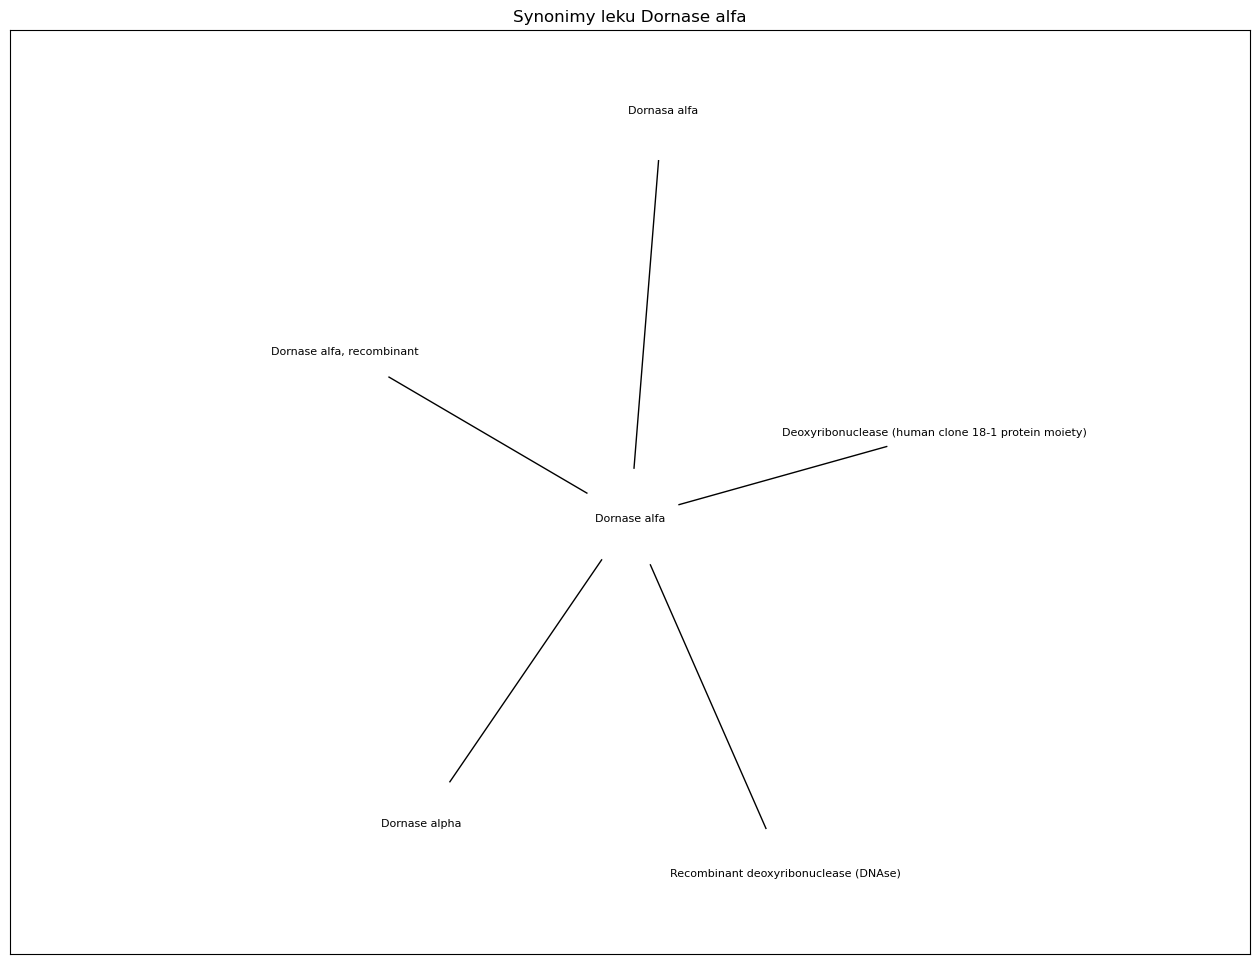

,ID,Name,Synonimy
0,DB00001,Lepirudin,"[[Leu1, Thr2]-63-desulfohirudin, Desulfatohiru..."
1,DB00002,Cetuximab,"[Cetuximab, Cétuximab, Cetuximabum, 2.7.10.1, ..."
2,DB00003,Dornase alfa,[Deoxyribonuclease (human clone 18-1 protein m...
3,DB00004,Denileukin diftitox,"[Denileukin, Denileukin diftitox, Interleukin-..."
4,DB00005,Etanercept,"[Etanercept, etanercept-szzs, etanercept-ykro,..."
...,...,...,...
95,DB00104,Octreotide,"[Octreotida, Octreotide, Octreotidum, Octrotid..."
96,DB00105,Interferon alfa-2b,"[Interferon alfa-2b, Interferon alfa-2b (recom..."
97,DB00106,Abarelix,"[Abarelix, GnRH receptor, GRHR]"
98,DB00107,Oxytocin,"[Oxitocina, Oxytocin, OT-R, 3.4.21.26, PE, PEP..."


In [194]:
#zadanie 2
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))
wiersze = []

for lek in data:
    synonimy = []
    pom = lek.find_all('synonyms')
    
    for i in pom:
        synonimy += i.find_all('synonym')
    
    lek_info = {
        'ID' : lek.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text,
        'Name' : lek.find('name').text,
        'Synonimy' : [i.text for i in synonimy]    
    }
    
    wiersze.append(lek_info)

wynik2 = pd.DataFrame(wiersze)



def znajdz_synonimy(id):
    if id not in wynik2['ID'].values:
        print("Podano błędne id.")
        return
    
    syno = wynik2.loc[wynik2['ID'] == id, 'Synonimy'].values[0]
    name = wynik2.loc[wynik2['ID'] == id, 'Name'].values[0] 
    
    graph = nx.Graph()
    graph.add_nodes_from(syno)
    
    krawedzie = []
    for i in syno:
        if(i != name):
            krawedzie.append((i, name))
    graph.add_edges_from(krawedzie)
    
    pozycje = nx.kamada_kawai_layout(graph)

    plt.figure(figsize=(16,12))
    
    nx.draw_networkx_edges(graph, pozycje)
    etykiety = {i: str(i) for i in graph.nodes()}
    nx.draw_networkx_nodes(graph, pozycje, alpha=1, node_color="white", node_size=5000)
    nx.draw_networkx_labels(graph, pozycje, labels=etykiety, font_size=8)
    
    plt.xlim(-2, 2)
    plt.title("Synonimy leku " +  str(name))
    plt.show()

znajdz_synonimy('DB00003')

wynik2

In [93]:
#zadanie 3 wersja 1.
from bs4 import BeautifulSoup
import pandas as pd
with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

def znajdz_produkty(id):
    lek = None
    for lek_przeg in data:
        id_przeg = lek_przeg.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text
        if(id_przeg == id):
            lek = lek_przeg
            break

    if(lek == None):
        print("Podano błędne id.")
        return
    
    wiersze = []
    produkty = lek.find_all('products')
    
    for lista_prod in produkty:
        produkty2 = lista_prod.find_all('product')
        
        for produkt in produkty2:
            produkt_info = {
                "ID_leku" : id,
                "Nazwa_produktu " : produkt.find('name').text,
                "Producent" : produkt.find('labeller').text,
                "Kod" : produkt.find('ndc-product-code').text,
                "Postać": produkt.find('dosage-form').text,
                "Sposób aplikacji" : produkt.find('route').text,
                "Dawka" : produkt.find('strength').text,
                "Kraj" : produkt.find('country').text,
                "Agencja rejestrujące" : produkt.find('source').text
            }

            wiersze.append(produkt_info)
    return pd.DataFrame(wiersze)

znajdz_produkty('DB00108')

,ID_leku,Nazwa_produktu,Producent,Kod,Postać,Sposób aplikacji,Dawka,Kraj,Agencja rejestrujące
0,DB00108,Tysabri,Elan Pharmaceuticals,59075-730,Injection,Intravenous,300 mg/15mL,US,FDA NDC
1,DB00108,Tysabri,Biogen Inc.,64406-008,Injection,Intravenous,300 mg/15mL,US,FDA NDC
2,DB00108,Tysabri,Biogen,,Solution,Intravenous,300 mg / 15 mL,Canada,DPD
3,DB00108,Tysabri,Biogen Netherlands B.V.,,"Injection, solution, concentrate",Intravenous,300 mg,EU,EMA
4,DB00108,Tysabri,Biogen Netherlands B.V.,,"Injection, solution, concentrate",Intravenous,150 mg,EU,EMA


In [13]:
#zadanie 3 wersja 2.
from bs4 import BeautifulSoup
import pandas as pd
with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

def znajdz_produkty():
    lek = None
    wiersze = []
    for lek_przeg in data:
        id_przeg = lek_przeg.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text
        lek = lek_przeg
            
        produkty = lek.find_all('products')
        
        for lista_prod in produkty:
            produkty2 = lista_prod.find_all('product')
            
            for produkt in produkty2:
                produkt_info = {
                    "ID_leku" : id_przeg,
                    "Nazwa_produktu " : produkt.find('name').text,
                    "Producent" : produkt.find('labeller').text,
                    "Kod" : produkt.find('ndc-product-code').text,
                    "Postać": produkt.find('dosage-form').text,
                    "Sposób aplikacji" : produkt.find('route').text,
                    "Dawka" : produkt.find('strength').text,
                    "Kraj" : produkt.find('country').text,
                    "Agencja rejestrujące" : produkt.find('source').text
                }

                wiersze.append(produkt_info)
    return pd.DataFrame(wiersze)

wynik3 = znajdz_produkty()
wynik3

,ID_leku,Nazwa_produktu,Producent,Kod,Postać,Sposób aplikacji,Dawka,Kraj,Agencja rejestrujące
0,DB00001,Refludan,Bayer,50419-150,Powder,Intravenous,50 mg/1mL,US,FDA NDC
1,DB00001,Refludan,Bayer,,"Powder, for solution",Intravenous,50 mg / vial,Canada,DPD
2,DB00001,Refludan,Celgene Europe Limited,,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
3,DB00001,Refludan,Celgene Europe Limited,,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
4,DB00001,Refludan,Celgene Europe Limited,,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
...,...,...,...,...,...,...,...,...,...
4579,DB00108,Tysabri,Elan Pharmaceuticals,59075-730,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4580,DB00108,Tysabri,Biogen Inc.,64406-008,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4581,DB00108,Tysabri,Biogen,,Solution,Intravenous,300 mg / 15 mL,Canada,DPD
4582,DB00108,Tysabri,Biogen Netherlands B.V.,,"Injection, solution, concentrate",Intravenous,300 mg,EU,EMA


In [14]:
#zadanie 4
from bs4 import BeautifulSoup
import pandas as pd
with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

def znajdz_szlaki():
    wiersze = []
    for lek in data:
        grupy_szlakow = lek.find_all('pathways')
        for lista_szlakow in grupy_szlakow:
            szlaki = lista_szlakow.find_all('pathway')
            for szlak in szlaki:
                nazwy_lekow = []
                id_lekow = []
                enzymy = []

                for leki in szlak.find_all('drugs'):
                    for lek in leki.find_all('drug'):
                        nazwy_lekow.append(lek.find('name').text)
                        id_lekow.append(lek.find('drugbank-id').text)
                
                for enzym in szlak.find_all('enzymes'):
                    enzymy += enzym.find_all('uniprot-id')

                szlak_info = {
                    "ID_leku" : lek.find("drugbank-id").text,
                    "smpdb-id" : szlak.find("smpdb-id").text,
                    "Nazwa" : szlak.find("name").text,
                    "Kategoria" : szlak.find("category").text,
                    "Nazwy leków" :  nazwy_lekow,
                    "ID leków" : id_lekow,
                    "Enzymy" : enzymy
                }
                wiersze.append(szlak_info)
    wynik = pd.DataFrame(wiersze)
    return wynik, wynik.shape[0]

wyn = znajdz_szlaki()
print(wyn[1])
wynik4 = wyn[0]
wynik4


12


,ID_leku,smpdb-id,Nazwa,Kategoria,Nazwy leków,ID leków,Enzymy
0,DB01373,SMP0000278,Lepirudin Action Pathway,drug_action,"[Lepirudin, Phylloquinone, Calcium]","[DB00001, DB01022, DB01373]","[[P00734], [P00748], [P02452], [P03952], [P039..."
1,DB00002,SMP0000474,Cetuximab Action Pathway,drug_action,[Cetuximab],[DB00002],[[P00533]]
2,DB01373,SMP0000277,Bivalirudin Action Pathway,drug_action,"[Bivalirudin, Phylloquinone, Calcium]","[DB00006, DB01022, DB01373]","[[P00734], [P00748], [P02452], [P03952], [P039..."
3,DB01373,SMP0000280,Alteplase Action Pathway,drug_action,"[Alteplase, Phylloquinone, Calcium]","[DB00009, DB01022, DB01373]","[[P00747], [P00748], [P02452], [P03952], [P039..."
4,DB01373,SMP0000284,Urokinase Action Pathway,drug_action,"[Urokinase, Phylloquinone, Calcium]","[DB00013, DB01022, DB01373]","[[P00747], [P00748], [P02452], [P03952], [P039..."
5,DB01373,SMP0000285,Reteplase Action Pathway,drug_action,"[Reteplase, Phylloquinone, Calcium]","[DB00015, DB01022, DB01373]","[[P00747], [P00748], [P02452], [P03952], [P039..."
6,DB01373,SMP0000281,Anistreplase Action Pathway,drug_action,"[Anistreplase, Phylloquinone, Calcium]","[DB00029, DB01022, DB01373]","[[P00747], [P00748], [P02452], [P03952], [P039..."
7,DB01373,SMP0000283,Tenecteplase Action Pathway,drug_action,"[Tenecteplase, Phylloquinone, Calcium]","[DB00031, DB01022, DB01373]","[[P00747], [P00748], [P02452], [P03952], [P039..."
8,DB00054,SMP0000265,Abciximab Action Pathway,drug_action,[Abciximab],[DB00054],"[[P08514], [P05106]]"
9,DB00063,SMP0000266,Eptifibatide Action Pathway,drug_action,[Eptifibatide],[DB00063],"[[P08514], [P05106]]"


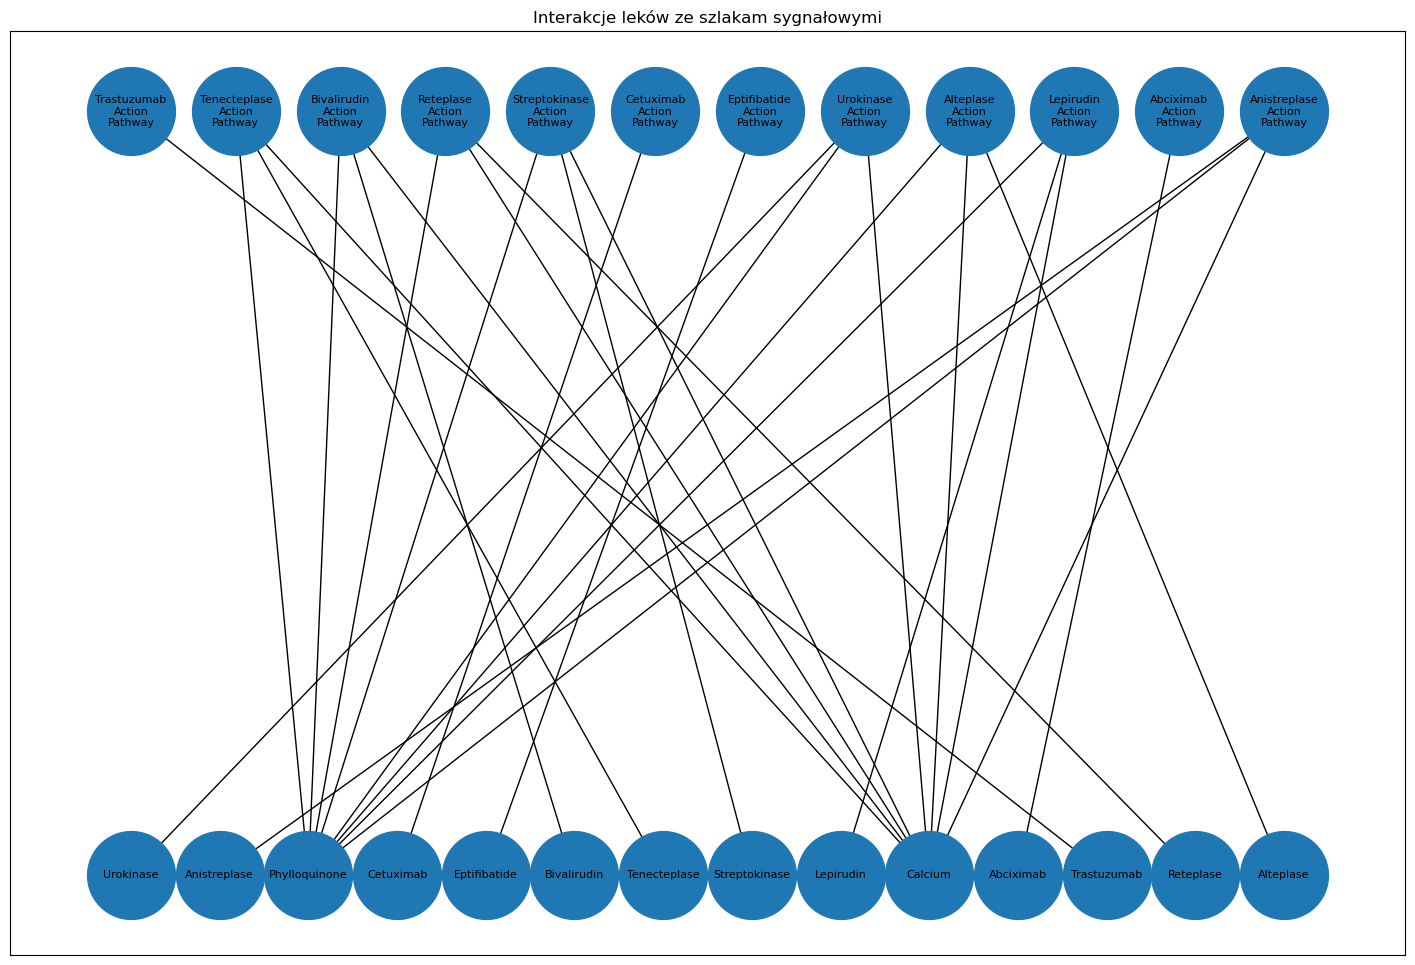

,smpdb-id,Nazwa,Nazwy_leków,ID leków
0,SMP0000278,Lepirudin Action Pathway,"[Lepirudin, Phylloquinone, Calcium]","[DB00001, DB01022, DB01373]"
1,SMP0000474,Cetuximab Action Pathway,[Cetuximab],[DB00002]
2,SMP0000277,Bivalirudin Action Pathway,"[Bivalirudin, Phylloquinone, Calcium]","[DB00006, DB01022, DB01373]"
3,SMP0000280,Alteplase Action Pathway,"[Alteplase, Phylloquinone, Calcium]","[DB00009, DB01022, DB01373]"
4,SMP0000284,Urokinase Action Pathway,"[Urokinase, Phylloquinone, Calcium]","[DB00013, DB01022, DB01373]"
5,SMP0000285,Reteplase Action Pathway,"[Reteplase, Phylloquinone, Calcium]","[DB00015, DB01022, DB01373]"
6,SMP0000281,Anistreplase Action Pathway,"[Anistreplase, Phylloquinone, Calcium]","[DB00029, DB01022, DB01373]"
7,SMP0000283,Tenecteplase Action Pathway,"[Tenecteplase, Phylloquinone, Calcium]","[DB00031, DB01022, DB01373]"
8,SMP0000265,Abciximab Action Pathway,[Abciximab],[DB00054]
9,SMP0000266,Eptifibatide Action Pathway,[Eptifibatide],[DB00063]


In [15]:
#zadanie 5
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx

with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

def znajdz_szlaki():
    wiersze = []
    for lek in data:
        grupy_szlakow = lek.find_all('pathways')
        for lista_szlakow in grupy_szlakow:
            szlaki = lista_szlakow.find_all('pathway')
            for szlak in szlaki:
                nazwy_lekow = []
                id_lekow = []

                for leki in szlak.find_all('drugs'):
                    for lek in leki.find_all('drug'):
                        nazwy_lekow.append(lek.find('name').text)
                        id_lekow.append(lek.find('drugbank-id').text)
                
                szlak_info = {
                    "smpdb-id" : szlak.find("smpdb-id").text,
                    "Nazwa" : szlak.find("name").text,
                    "Nazwy_leków" :  nazwy_lekow,
                    "ID leków" : id_lekow,
                }
                wiersze.append(szlak_info)
    wynik = pd.DataFrame(wiersze)
    return wynik

wyn = znajdz_szlaki()

graph = nx.Graph()
grupaL = []
grupaP = set()
krawedzie = []

for wiersz in wyn.itertuples():
    lek = getattr(wiersz, 'Nazwa')
    pom = getattr(wiersz, 'Nazwy_leków')
    
    for i in range(len(lek)):
        if(lek[i] == ' '):
            lek = lek[:i] + "\n" + lek[(i+1):]
    
    grupaP.update(pom)
    grupaL.append(lek)
    for i in pom:
        krawedzie.append((lek, i))


plt.figure(figsize=(18,12))
graph.add_nodes_from(grupaL, bipartite=0)
graph.add_nodes_from(grupaP, bipartite=1)
graph.add_edges_from(krawedzie)

pozycje = nx.bipartite_layout(graph, nodes=grupaL)
pozycje.update(nx.bipartite_layout(graph, nodes=grupaP))
for pozycja, (x, y) in pozycje.items():
    pozycje[pozycja] = (y, x)

nx.draw_networkx_nodes(graph, pozycje, node_size=4000)
nx.draw_networkx_edges(graph, pozycje)
nx.draw_networkx_labels(graph, pozycje, font_size=8)

plt.title("Interakcje leków ze szlakam sygnałowymi")
plt.show()
wynik5=wyn
wyn




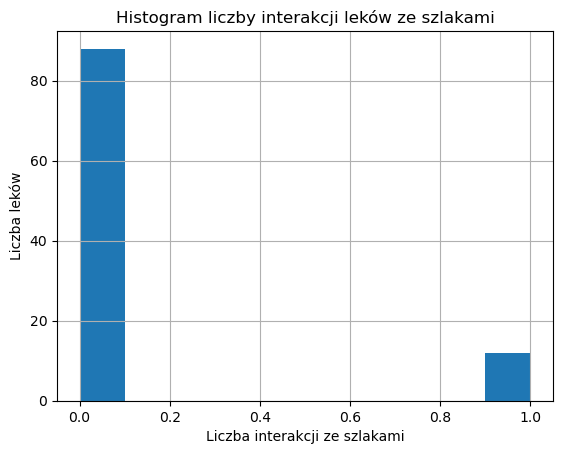

,ID,Liczba
0,DB00001,1
1,DB00002,1
2,DB00003,0
3,DB00004,0
4,DB00005,0
...,...,...
95,DB00104,0
96,DB00105,0
97,DB00106,0
98,DB00107,0


In [16]:
#zadanie 6
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')

data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))
wiersze = []

for lek in data:
    interakcje = []
    bloki = lek.find_all('food-interactions')
    
    for i in bloki:
        interakcje += i.find_all('food-interaction')
        
    lek_info = {
        'ID' : lek.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text,
    }
    wiersze.append(lek_info)

wynik = pd.DataFrame(wiersze)
wynik['Liczba'] = 0

data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

wiersze = []
for lek in data:
    grupy_szlakow = lek.find_all('pathways')
    for lista_szlakow in grupy_szlakow:
        szlaki = lista_szlakow.find_all('pathway')
        for szlak in szlaki:
            nazwy_lekow = []
            id_lekow = []

            for leki in szlak.find_all('drugs'):
                for lek in leki.find_all('drug'):
                    id = lek.find('drugbank-id').text
                    pom = wynik.loc[wynik['ID'] == id, 'Liczba']
                    if(pom.empty):
                        continue
                        #gdy chcemu uwzględnić również leki niebędące w 100 opisanych:
                        #wynik.loc[len(wynik)] = [id, 0]
                    wynik.loc[wynik['ID'] == id, 'Liczba'] +=1

wynik['Liczba'].hist()

plt.title('Histogram liczby interakcji leków ze szlakami')
plt.xlabel('Liczba interakcji ze szlakami')
plt.ylabel('Liczba leków')

plt.show()

wynik6 = wynik
wynik


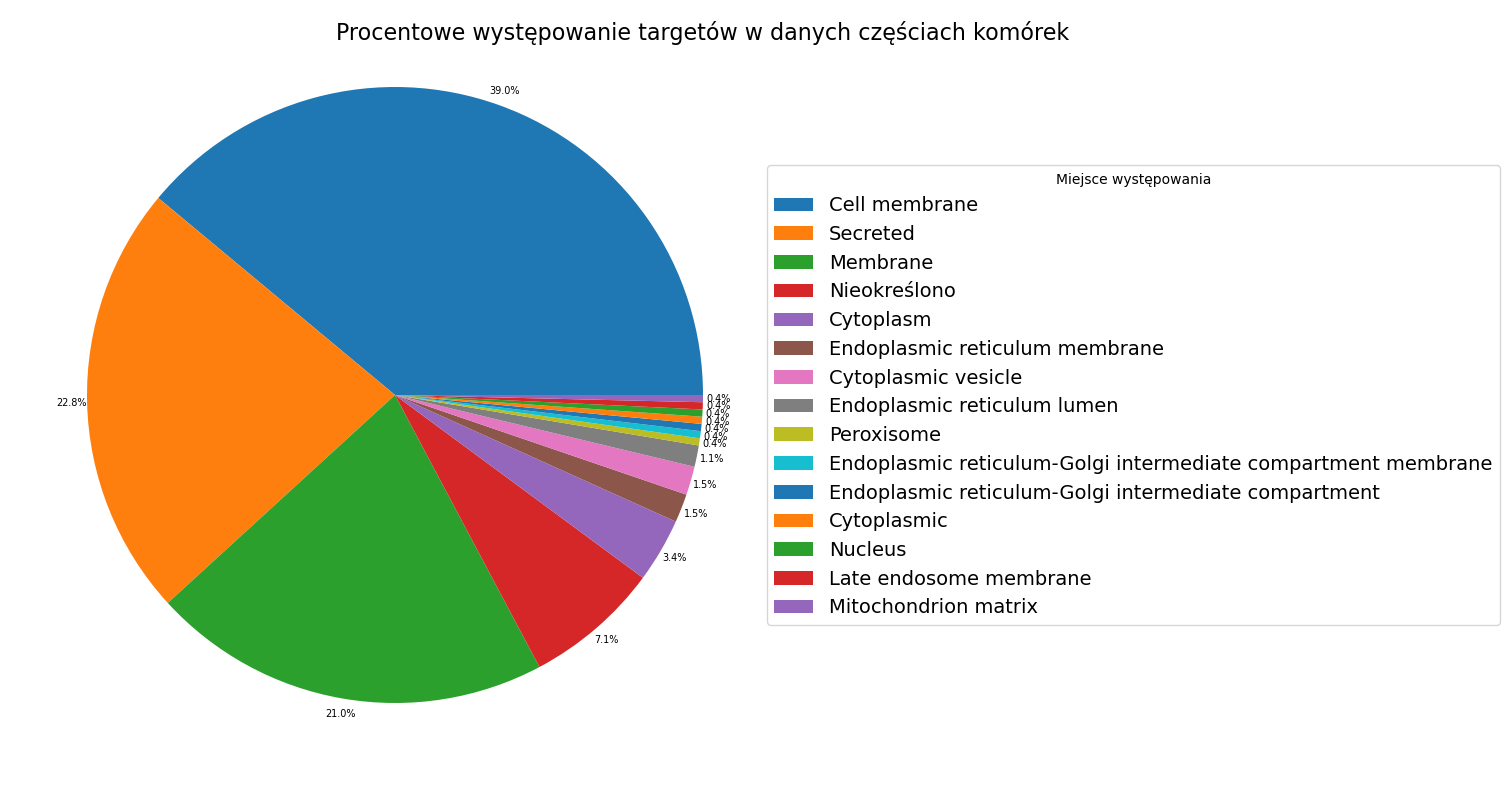

,ID,Zewnętrzna baza,ID w bazie,Nazwa polipeptydu,Nazwa genu kodującego,GenAtlas ID,Numer chromosomu,Lokalizacja w komórce
0,BE0000048,Swiss-Prot,P00734,Prothrombin,F2,F2,11,Secreted
1,BE0000767,Swiss-Prot,P00533,Epidermal growth factor receptor,EGFR,EGFR,7,Cell membrane
2,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
3,BE0002094,Swiss-Prot,P02745,Complement C1q subcomponent subunit A,C1QA,C1QA,1,Secreted
4,BE0002095,Swiss-Prot,P02746,Complement C1q subcomponent subunit B,C1QB,C1QB,1,Secreted
...,...,...,...,...,...,...,...,...
262,BE0000844,Swiss-Prot,P30559,Oxytocin receptor,OXTR,OXTR,3,Cell membrane
263,BE0000590,Swiss-Prot,P13612,Integrin alpha-4,ITGA4,ITGA4,2,Membrane
264,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
265,BE0000710,Swiss-Prot,P12314,High affinity immunoglobulin gamma Fc receptor I,FCGR1A,FCGR1A,1,Cell membrane


In [17]:
#zadanie 7, 8
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

def wypelnij(pom):
     if(pom is None):
         return "Nieokreślono"
     else:
          if (pom.text == ''):
               return "Nieokreślono"
          return pom.text

wiersze = []

for lek in data:
     grupy_targetow = lek.find_all('targets')

     for grupa_targetow in grupy_targetow:
          targety = grupa_targetow.find_all('target')

          for target in targety:
               poli = target.find("polypeptide")

               if(poli is None):
                    baza = None
                    id_baza = None
               else:
                    baza = poli.get('source')
                    id_baza = poli.get('id')

               grupy_external = target.findAll('external-identifiers')
               gen_id = None

               for grupa_external in grupy_external:
                    lista_external = grupa_external.findAll('external-identifier')
                    for external in lista_external:
                         if(external.find('resource').text == 'GenAtlas'):
                              gen_id = external.find('identifier').text
                
               target_info = {
                    "ID" : wypelnij(target.find("id")),
                    "Zewnętrzna baza" : baza,
                    "ID w bazie" : id_baza,
                    "Nazwa polipeptydu" : wypelnij(target.find("name")),
                    "Nazwa genu kodującego" : wypelnij(target.find("gene-name")),
                    "GenAtlas ID" : gen_id,
                    "Numer chromosomu" : wypelnij(target.find("chromosome-location")),
                    "Lokalizacja w komórce" : wypelnij(target.find("cellular-location"))
               }
               wiersze.append(target_info)

wynik = pd.DataFrame(wiersze)

policzenie = wynik['Lokalizacja w komórce'].value_counts()
wykres = policzenie.plot(kind='pie', autopct='%1.1f%%', labels=None, fontsize=7, figsize=(10,10), pctdistance=1.05, ylabel = '')

plt.legend(labels = policzenie.index, fontsize = 14, loc='center left', bbox_to_anchor=(0.97, 0.5), title = 'Miejsce występowania')
plt.title("Procentowe występowanie targetów w danych częściach komórek", fontsize = 16, y = 0.95, x = 0.9)

plt.show()
wynik7 = wynik
wynik







Liczba zatwierdzonych niewycofanych leków: 89


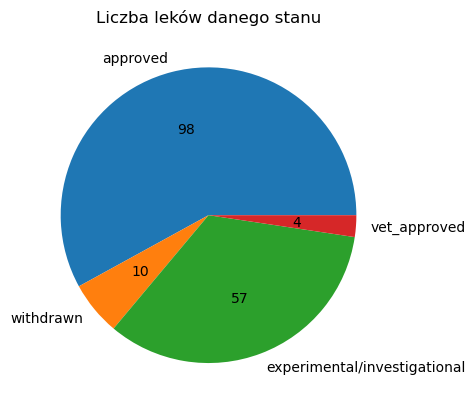

,Stan,Ile
0,approved,98
1,withdrawn,10
2,experimental/investigational,57
3,vet_approved,4


In [17]:
#zadanie 9
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))
wynik = pd.DataFrame({'Stan' : [], 'Ile' : []})

zatw_niewycof = 0

approved = []
withdrawn = []

for lek in data:
    id = lek.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text
    grupy_grup = lek.findAll('groups')
    for grupa_grup in grupy_grup:
        lista_grup = lek.findAll('group')
        for grupa in lista_grup:
            stan = grupa.text
            if(stan == 'approved'):
                approved.append(id)
            if(stan == 'withdrawn'):
                withdrawn.append(id)
            if(stan == 'experimental' or stan == 'investigational'):
                stan = 'experimental/investigational'
            if(stan in wynik['Stan'].values):
                wynik.loc[wynik['Stan'] == stan, 'Ile'] +=1
            else:
                wynik.loc[len(wynik)] = [stan, 1]

    #wiersze.append(lek_info)

for i in approved:
    if i not in withdrawn:
        zatw_niewycof += 1

def wypisz(val):
    wszystkie = wynik['Ile'].sum()
    return str(round(val / 100 * wszystkie))
print("Liczba zatwierdzonych niewycofanych leków: " + str(zatw_niewycof))

wykres = wynik.set_index('Stan')['Ile'].plot(kind='pie', ylabel = '', autopct = wypisz)

plt.title("Liczba leków danego stanu")
plt.show()

wynik9 = str(zatw_niewycof)
wynik

In [1]:
#zadanie 10 wersja 1
from bs4 import BeautifulSoup
import pandas as pd
with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

def znajdz_produkty(id):
    lek = None
    for lek_przeg in data:

        id_przeg = lek_przeg.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text
        if(id_przeg == id):
            lek = lek_przeg
            break

    if(lek == None):
        print("Podano błędne id.")
        return
    
    wiersze = []
    grupy_interakcji = lek.find_all('drug-interactions')
    
    for grupa_interakcji in grupy_interakcji:
        lista_interakcji = grupa_interakcji.find_all('drug-interaction')
        
        for interakcja in lista_interakcji:

            interakcja_info = {
                "ID_leku" : id,
                "Nazwa_leku " : lek.find('name').text,
                "ID leku w interakcji" : interakcja.find('drugbank-id').text,
                "Nazwa leku w interackji" : interakcja.find('name').text,
                "Opis": interakcja.find('description').text,
            }

            wiersze.append(interakcja_info)
    return pd.DataFrame(wiersze)

znajdz_produkty('DB00001')

,ID_leku,Nazwa_leku,ID leku w interakcji,Nazwa leku w interackji,Opis
0,DB00001,Lepirudin,DB06605,Apixaban,Apixaban may increase the anticoagulant activi...
1,DB00001,Lepirudin,DB06695,Dabigatran etexilate,Dabigatran etexilate may increase the anticoag...
2,DB00001,Lepirudin,DB01254,Dasatinib,The risk or severity of bleeding and hemorrhag...
3,DB00001,Lepirudin,DB01609,Deferasirox,The risk or severity of gastrointestinal bleed...
4,DB00001,Lepirudin,DB01586,Ursodeoxycholic acid,The risk or severity of bleeding and bruising ...
...,...,...,...,...,...
647,DB00001,Lepirudin,DB09422,Soybean oil,The therapeutic efficacy of Lepirudin can be d...
648,DB00001,Lepirudin,DB09567,Olive oil,The therapeutic efficacy of Lepirudin can be d...
649,DB00001,Lepirudin,DB15434,Mosunetuzumab,The risk or severity of bleeding can be increa...
650,DB00001,Lepirudin,DB17472,Pirtobrutinib,The risk or severity of bleeding can be increa...


In [18]:
#zadanie 10 wersja 2
from bs4 import BeautifulSoup
import pandas as pd
with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

wiersze = []
for lek in data:

    id = lek.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text
    grupy_interakcji = lek.find_all('drug-interactions')
    
    for grupa_interakcji in grupy_interakcji:
        lista_interakcji = grupa_interakcji.find_all('drug-interaction')
        
        for interakcja in lista_interakcji:

            interakcja_info = {
                "ID_leku" : id,
                "Nazwa_leku " : lek.find('name').text,
                "ID leku w interakcji" : interakcja.find('drugbank-id').text,
                "Nazwa leku w interackji" : interakcja.find('name').text,
                "Opis": interakcja.find('description').text,
            }

            wiersze.append(interakcja_info)
wynik = pd.DataFrame(wiersze)
wynik10 = wynik
wynik

,ID_leku,Nazwa_leku,ID leku w interakcji,Nazwa leku w interackji,Opis
0,DB00001,Lepirudin,DB06605,Apixaban,Apixaban may increase the anticoagulant activi...
1,DB00001,Lepirudin,DB06695,Dabigatran etexilate,Dabigatran etexilate may increase the anticoag...
2,DB00001,Lepirudin,DB01254,Dasatinib,The risk or severity of bleeding and hemorrhag...
3,DB00001,Lepirudin,DB01609,Deferasirox,The risk or severity of gastrointestinal bleed...
4,DB00001,Lepirudin,DB01586,Ursodeoxycholic acid,The risk or severity of bleeding and bruising ...
...,...,...,...,...,...
50683,DB00108,Natalizumab,DB14766,Etrasimod,The risk or severity of immunosuppression can ...
50684,DB00108,Natalizumab,DB15043,Toripalimab,The risk or severity of adverse effects can be...
50685,DB00108,Natalizumab,DB18701,"Chikungunya vaccine (live, attenuated)",The risk or severity of infection can be incre...
50686,DB00108,Natalizumab,DB18705,SARS-CoV-2 virus recombinant spike (S) protein...,The therapeutic efficacy of SARS-CoV-2 virus r...


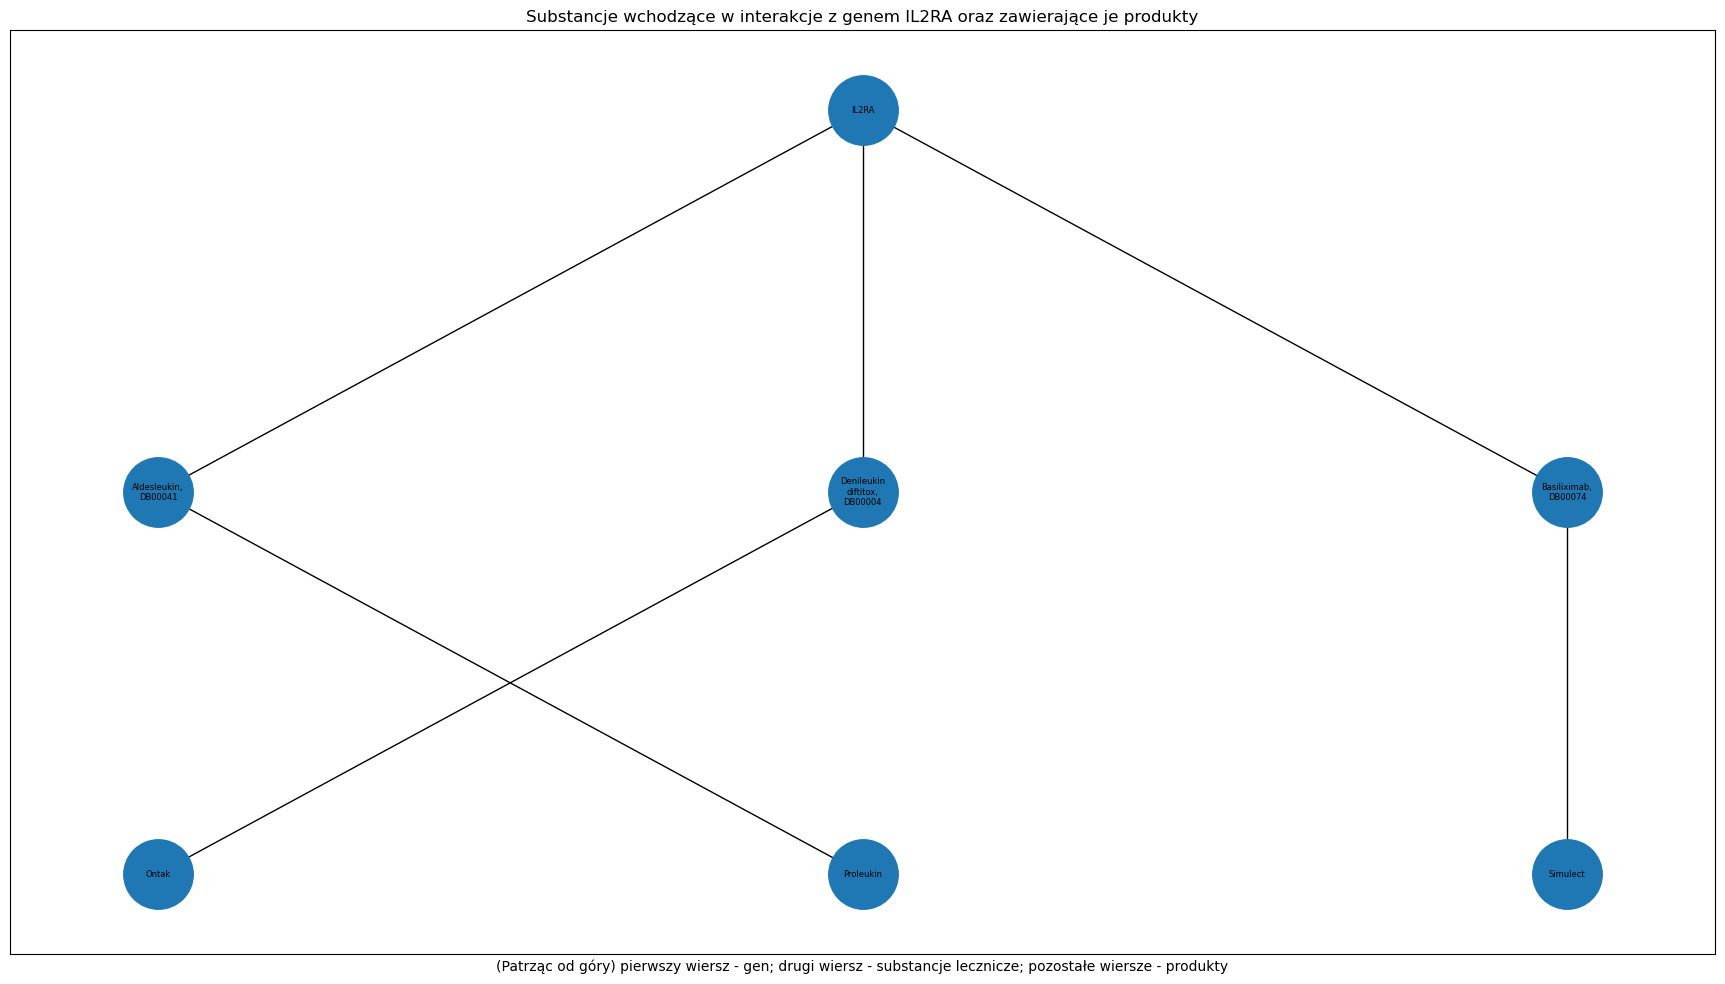

In [1]:
#zadanie 11
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

def wypelnij(pom):
    if(pom is None):
         return "Nieokreślono"
    else:
         if (pom.text == ''):
              return "Nieokreślono"
         return pom.text


def zawijaj(nap):
     for i in range(len(nap)):
        if(nap[i] == ' '):
            nap = nap[:i] + "\n" + nap[(i+1):]

     return nap

def prezentuj(id):
     substancje = set()
     prod = set()
     krawedzie = set()
     for lek in data:
          grupy_targetow = lek.find_all('targets')
          for grupa_targetow in grupy_targetow:
               targety = grupa_targetow.find_all('target')

          for target in targety:
               lista_poli = target.findAll("polypeptide")

               for poli in lista_poli:

                    grupy_external = target.findAll('external-identifiers')
                    gen_id = None
                    for grupa_external in grupy_external:
                         lista_external = grupa_external.findAll('external-identifier')
                         for external in lista_external:
                              if(external.find('resource').text == 'GenAtlas'):
                                   gen_id = external.find('identifier').text
                    if(gen_id == id):
                         id_subst = zawijaj(lek.find('name').text + ', ' + lek.find(
                              lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text)
                         substancje.add(id_subst)
                         krawedzie.add((id_subst, id))
                         produkty = lek.find_all('products')
                         
                         for lista_prod in produkty:
                              produkty2 = lista_prod.find_all('product')
                              
                              for produkt in produkty2:
                                   id_prod = zawijaj(produkt.find('name').text)
                                   prod.add(id_prod)
                                   krawedzie.add((id_subst, id_prod))

     plt.figure(figsize=(22,12))

     graph = nx.Graph()

     
     dodaj = []

     i = 0
     jj = 0
     for j in prod:
          dodaj.append(j)
          jj+=1
          if(jj % 21 == 0):
               graph.add_nodes_from(dodaj, subset=i)
               i+=1
               dodaj = []
     if(len(dodaj) > 0):
          graph.add_nodes_from(dodaj, subset=i)
          i+=1
          dodaj = []

     graph.add_nodes_from(substancje, subset=i)
     i+=1
     graph.add_node(id, subset=i)
     
     #graph.add_nodes_from(prod, subset=0)
     graph.add_edges_from(krawedzie)
     pozycje = nx.multipartite_layout(graph)

     for pozycja, (x, y) in pozycje.items():
          pozycje[pozycja] = (y, x*2)

     nx.draw_networkx_nodes(graph, pozycje, node_size=2500)
     nx.draw_networkx_edges(graph, pozycje)
     nx.draw_networkx_labels(graph, pozycje, font_size = 6)
     
     plt.xlabel("(Patrząc od góry) pierwszy wiersz - gen; drugi wiersz - substancje lecznicze; pozostałe wiersze - produkty")
     plt.title('Substancje wchodzące w interakcje z genem ' + id + ' oraz zawierające je produkty')
     plt.show()

prezentuj('IL2RA')





In [19]:
#zadanie 12
from bs4 import BeautifulSoup
import pandas as pd
import requests

#będę używał bazy UniProt

with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

def wypelnij(pom):
     if(pom is None):
         return "Nieokreślono"
     else:
          if (pom.text == ''):
               return "Nieokreślono"
          return pom.text

wiersze = []
for lek in data:
    grupy_targetow = lek.find_all('targets')

    for grupa_targetow in grupy_targetow:
        targety = grupa_targetow.find_all('target')

        for target in targety:
            poli = target.find_all("polypeptide")
            
            for peptyd in poli:
                baza = peptyd.get('source')
                id_baza = peptyd.get('id')

                url  = "https://rest.uniprot.org/uniprotkb/" + id_baza +'.xml'
                odpowiedz = requests.get(url)

                if(odpowiedz.status_code != 200):
                    print('Blad')
                    continue
                soup2 = BeautifulSoup(odpowiedz.text, 'xml')
                protein = soup2.find('protein')
                
                if(protein is None):
                    continue
                
                rec_name = protein.find('recommendedName')
                alt_name = protein.find('alternativeName')
                if(alt_name is None):
                    alt_name_full = 'Nieokreślono'
                else:
                    alt_name_full = wypelnij(alt_name.find('fullName'))
                
                target_info = {
                    "ID leku" : lek.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text,
                    "Nazwa leku" : wypelnij(lek.find('name')),
                    "ID polipeptydu" : id_baza,
                    "Nazwa": soup2.find('name'),
                    "Białko - nazwa rekomendowana" : wypelnij(rec_name.find('fullName')),
                    "Białko - nazwa alternatywna" : alt_name_full,
                    "Organizmy" : soup2.find('organism').find('name'),
                    "Długość sekwencji" : soup2.find('sequence').get('length'),
                    "Masa cząsteczkowa" : soup2.find('sequence').get('mass'),
                    "Existance" : soup2.find('proteinExistence').get('type')
                
                }
                
                wiersze.append(target_info)


wynik = pd.DataFrame(wiersze)
wynik12 = wynik
wynik








,ID leku,Nazwa leku,ID polipeptydu,Nazwa,Białko - nazwa rekomendowana,Białko - nazwa alternatywna,Organizmy,Długość sekwencji,Masa cząsteczkowa,Existance
0,DB00001,Lepirudin,P00734,[THRB_HUMAN],Prothrombin,Coagulation factor II,[Homo sapiens],622,70037,evidence at protein level
1,DB00002,Cetuximab,P00533,[EGFR_HUMAN],Epidermal growth factor receptor,Proto-oncogene c-ErbB-1,[Homo sapiens],None,None,evidence at protein level
2,DB00002,Cetuximab,O75015,[FCG3B_HUMAN],Low affinity immunoglobulin gamma Fc region re...,Fc-gamma RIII-beta,[Homo sapiens],233,26243,evidence at protein level
3,DB00002,Cetuximab,P02745,[C1QA_HUMAN],Complement C1q subcomponent subunit A,Nieokreślono,[Homo sapiens],245,26017,evidence at protein level
4,DB00002,Cetuximab,P02746,[C1QB_HUMAN],Complement C1q subcomponent subunit B,Nieokreślono,[Homo sapiens],253,26722,evidence at protein level
...,...,...,...,...,...,...,...,...,...,...
246,DB00107,Oxytocin,P30559,[OXYR_HUMAN],Oxytocin receptor,Nieokreślono,[Homo sapiens],389,42772,evidence at protein level
247,DB00108,Natalizumab,P13612,[ITA4_HUMAN],Integrin alpha-4,CD49 antigen-like family member D,[Homo sapiens],None,None,evidence at protein level
248,DB00108,Natalizumab,O75015,[FCG3B_HUMAN],Low affinity immunoglobulin gamma Fc region re...,Fc-gamma RIII-beta,[Homo sapiens],233,26243,evidence at protein level
249,DB00108,Natalizumab,P12314,[FCGR1_HUMAN],High affinity immunoglobulin gamma Fc receptor I,Fc-gamma RI,[Homo sapiens],None,None,evidence at protein level


In [3]:
#zadanie 13
from bs4 import BeautifulSoup
import pandas as pd
import random
from lxml import etree

ILE = 20000
MAMY = 100

def zamien(war):
    if(war < 1000):
        return 'DB00' + str(war)
    elif (war < 10000):
        return 'DB0' + str(war)
    else:
        return 'DB' + str(war)

with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()


soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

with open("drugbank_partial_and_generated.xml", "w", encoding="utf-8") as plik:
    plik.write(soup.prettify())

wartosci = {}
ostatni = 108
for lek in data:
    for tag in lek.children:
        #tagi = lek.find_all(True)
        if(tag.name is None):
            continue
        if(tag.name in wartosci):
            wartosci[tag.name].append(tag)
        else:
            wartosci[tag.name] = [tag]

ostatni += 1

drzewo = etree.parse("drugbank_partial_and_generated.xml")
baza = drzewo.getroot()


for i in range(ILE - MAMY):
    nowy_lek = etree.SubElement(baza, "drug", created="31-01-2025", type="biotech", updated="2024-01-02", xmlns="http://www.drugbank.ca")
    for klucz, lista in wartosci.items():
        if(klucz == "drugbank-id"):
            nowy_tag = etree.SubElement(nowy_lek, "drugbank-id", primary="true")
            nowy_tag.text = zamien(ostatni)
            ostatni+=1
            continue

        podtag = random.choice(lista)
        #print(ostatni-1)
        podtag2 = etree.fromstring(str(podtag))
        nowy_lek.append(podtag2)    
    baza.append(nowy_lek)

drzewo.write("drugbank_partial_and_generated.xml", pretty_print=True, xml_declaration = True)





KeyboardInterrupt: 

In [9]:
#zadanie 15
#Znajduje się w pliku main.py
#Należezy w terminalu odpalić:  uvicorn main:api --reload
#A następnie wejść na stronę http://127.0.0.1:8000/docs w przeglądarce
#można tam testować działanie programu

In [86]:
#zadanie 14
#Uwaga, aby testy zadziałały należy wcześniej uruchomić poprzednie komórki

import unittest



import pytest



@pytest.mark.parametrize("ID, Name, Typ, Postać", [('DB00001', 'Lepirudian', "biotech", 'solid'), ('DB00004', 'Denileukin diftitox', "biotech", 'liquid'), ('DB00106', 'Abarelix', 'small molecule', "solid")])
def test1(id, name, typ, postac):
    wiersz = wynik1[wynik1["ID"] == id]
    assert wiersz['Name'] == name
    assert wiersz['Typ'] == typ
    assert wiersz['Postać'] == postac
    
    #@pytest.mark.parametrize("a, b, expected", [(ul[0], ul[1], "109/60"), (ul[0], ul[2], "1/12"), (ul[1], ul[2], "1/5")])
    #def test_odejmij(a, b, expected):
    #    assert str(a - b) == expected
!pytest test.py -v

============================= test session starts ==============================
platform linux -- Python 3.12.3, pytest-7.4.4, pluggy-1.4.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /home/pstol/python/zaliczenie-1
plugins: anyio-4.2.0
collected 1 item                                                               

test.py::test PASSED                                                     [100%]

============================== 1 passed in 4.73s ===============================


============================= test session starts ==============================
platform linux -- Python 3.12.3, pytest-7.4.4, pluggy-1.4.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /home/pstol/python/zaliczenie-1
plugins: anyio-4.2.0
collected 0 items                                                              

============================ no tests ran in 0.00s =============================
ERROR: file or directory not found: test1



In [89]:
wiersz = wynik1[wynik1["ID"] == id]
#print(name)
print(wiersz['Name'].values[0])


Natalizumab


In [56]:
pytest.main(["-v"])

============================= test session starts ==============================
platform linux -- Python 3.12.3, pytest-7.4.4, pluggy-1.4.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /home/pstol/python/zaliczenie-1
plugins: anyio-4.2.0
collecting ... collected 0 items

============================ no tests ran in 0.00s =============================


<ExitCode.NO_TESTS_COLLECTED: 5>